In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline


/home/test/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/test/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any be

In [3]:
# Read the file named "pci_thesis_cleaned.csv" into a Pandas dataframe

# Drop S.N and save to new csv file


df = pd.read_csv('18-iri.csv')
df.drop(['S.N'],axis=1,inplace=True)

# df.drop(159,axis=0,inplace=True)

df.replace({'.0.16': 0.16, '0..66': 0.66, '..45': 0.45},inplace=True)

df.dropna(0, inplace=True)
# df.drop(df[df['AC3'] == '#VALUE!'].index[0], axis= 0, inplace=True)

df = df.astype(float)
print(f'any nan = {(np.any(np.isnan(df)))}')
print(f'all finite = {(np.all(np.isfinite(df)))}')


df.to_csv('18-iri-cleaned.csv',index=False)
# Load the data set
df = pd.read_csv('18-iri-cleaned.csv')

any nan = False
all finite = True


In [22]:
# Take a quick look at the dataset
df.head()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0800,0.000,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,1.13
1,0.00,0.00,0.56,0.00,0.15,0.15,0.42,0.0600,0.000,0.000,...,0.0,0.0,0.0,0.0,0.05,0.00,0.00,0.00,0.0,3.75
2,0.00,0.66,0.00,0.32,0.00,0.00,0.00,0.0000,0.000,0.000,...,0.0,0.0,0.0,0.0,0.00,0.00,0.11,0.66,0.0,3.48
3,0.25,0.00,0.00,0.00,0.15,0.00,0.00,1.1906,0.662,0.021,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,2.85
4,0.00,0.00,0.00,0.55,0.00,0.00,0.00,0.0000,0.000,0.210,...,0.0,0.0,0.0,0.0,0.15,0.66,0.00,0.66,0.0,3.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC1     283 non-null    float64
 1   AC2     283 non-null    float64
 2   AC3     283 non-null    float64
 3   BE1     283 non-null    float64
 4   BE2     283 non-null    float64
 5   BE3     283 non-null    float64
 6   D1      283 non-null    float64
 7   D2      283 non-null    float64
 8   D3      283 non-null    float64
 9   F1      283 non-null    float64
 10  F2      283 non-null    float64
 11  F3      283 non-null    float64
 12  G1      283 non-null    float64
 13  G2      283 non-null    float64
 14  G3      283 non-null    float64
 15  H1      283 non-null    float64
 16  H2      283 non-null    float64
 17  H3      283 non-null    float64
 18  IRI     283 non-null    float64
dtypes: float64(19)
memory usage: 42.1 KB


In [24]:
df.describe()

,A1,A2,A3,B1,B2,B3,C1,C2,C3,D1,...,F1,F2,F3,G1,G2,G3,H1,H2,H3,IRI
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,...,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000
mean,0.108028,0.287707,0.188396,0.088428,0.238112,0.196039,0.286810,0.420558,0.422391,0.156677,...,0.032488,0.019943,0.023406,0.033322,0.066385,0.079119,0.064194,0.194325,0.103548,5.070177
std,0.350276,0.692493,0.401664,0.291426,0.541783,0.519295,0.445617,0.635761,0.941914,0.277142,...,0.128503,0.064099,0.101855,0.134067,0.194555,0.216522,0.228117,0.528566,0.336929,2.633501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.560000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.950000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.130000,0.145000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.900000
75%,0.000000,0.235000,0.165000,0.000000,0.150000,0.150000,0.485000,0.600000,0.600000,0.205750,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.560000
max,2.500000,7.650000,2.480000,2.100000,4.320000,4.560000,3.010000,4.320000,12.500000,1.800000,...,1.200000,0.620000,1.010000,1.200000,1.620000,2.000000,2.220000,3.200000,3.080000,16.250000


#### Creation of Linear Regression Objects

In [5]:
# Choose all the predictors as the variable 'X' (note capitalization of X for multiple features)
X = df.drop(['IRI'],axis=1)

# Choose the response variable 'y' 
y = df.IRI



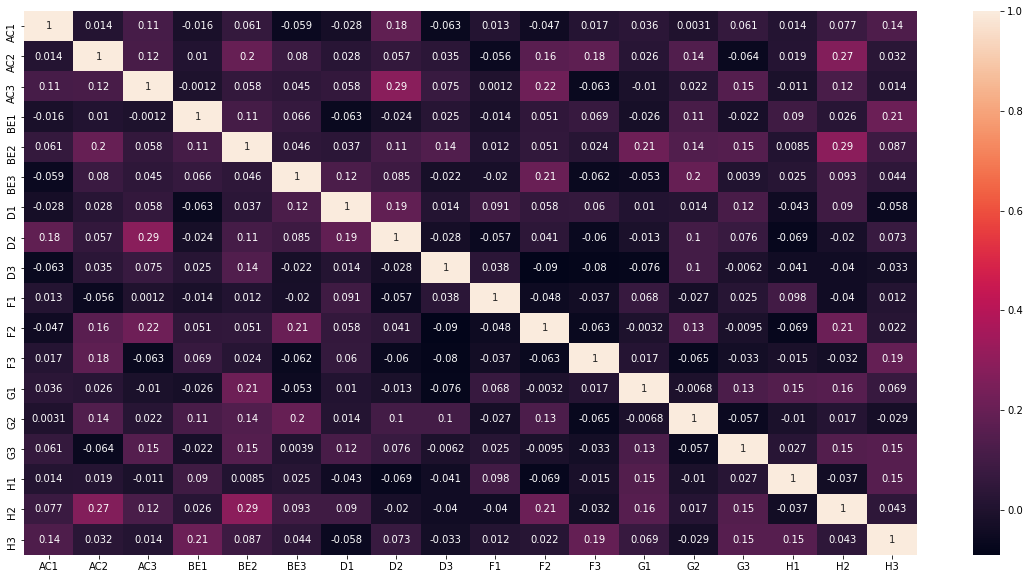

In [6]:
# Helper code to visualize the heatmap of the covariance matrix
corrMatrix = X.corr() 
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrMatrix, annot=True, ax=ax) 
plt.show()

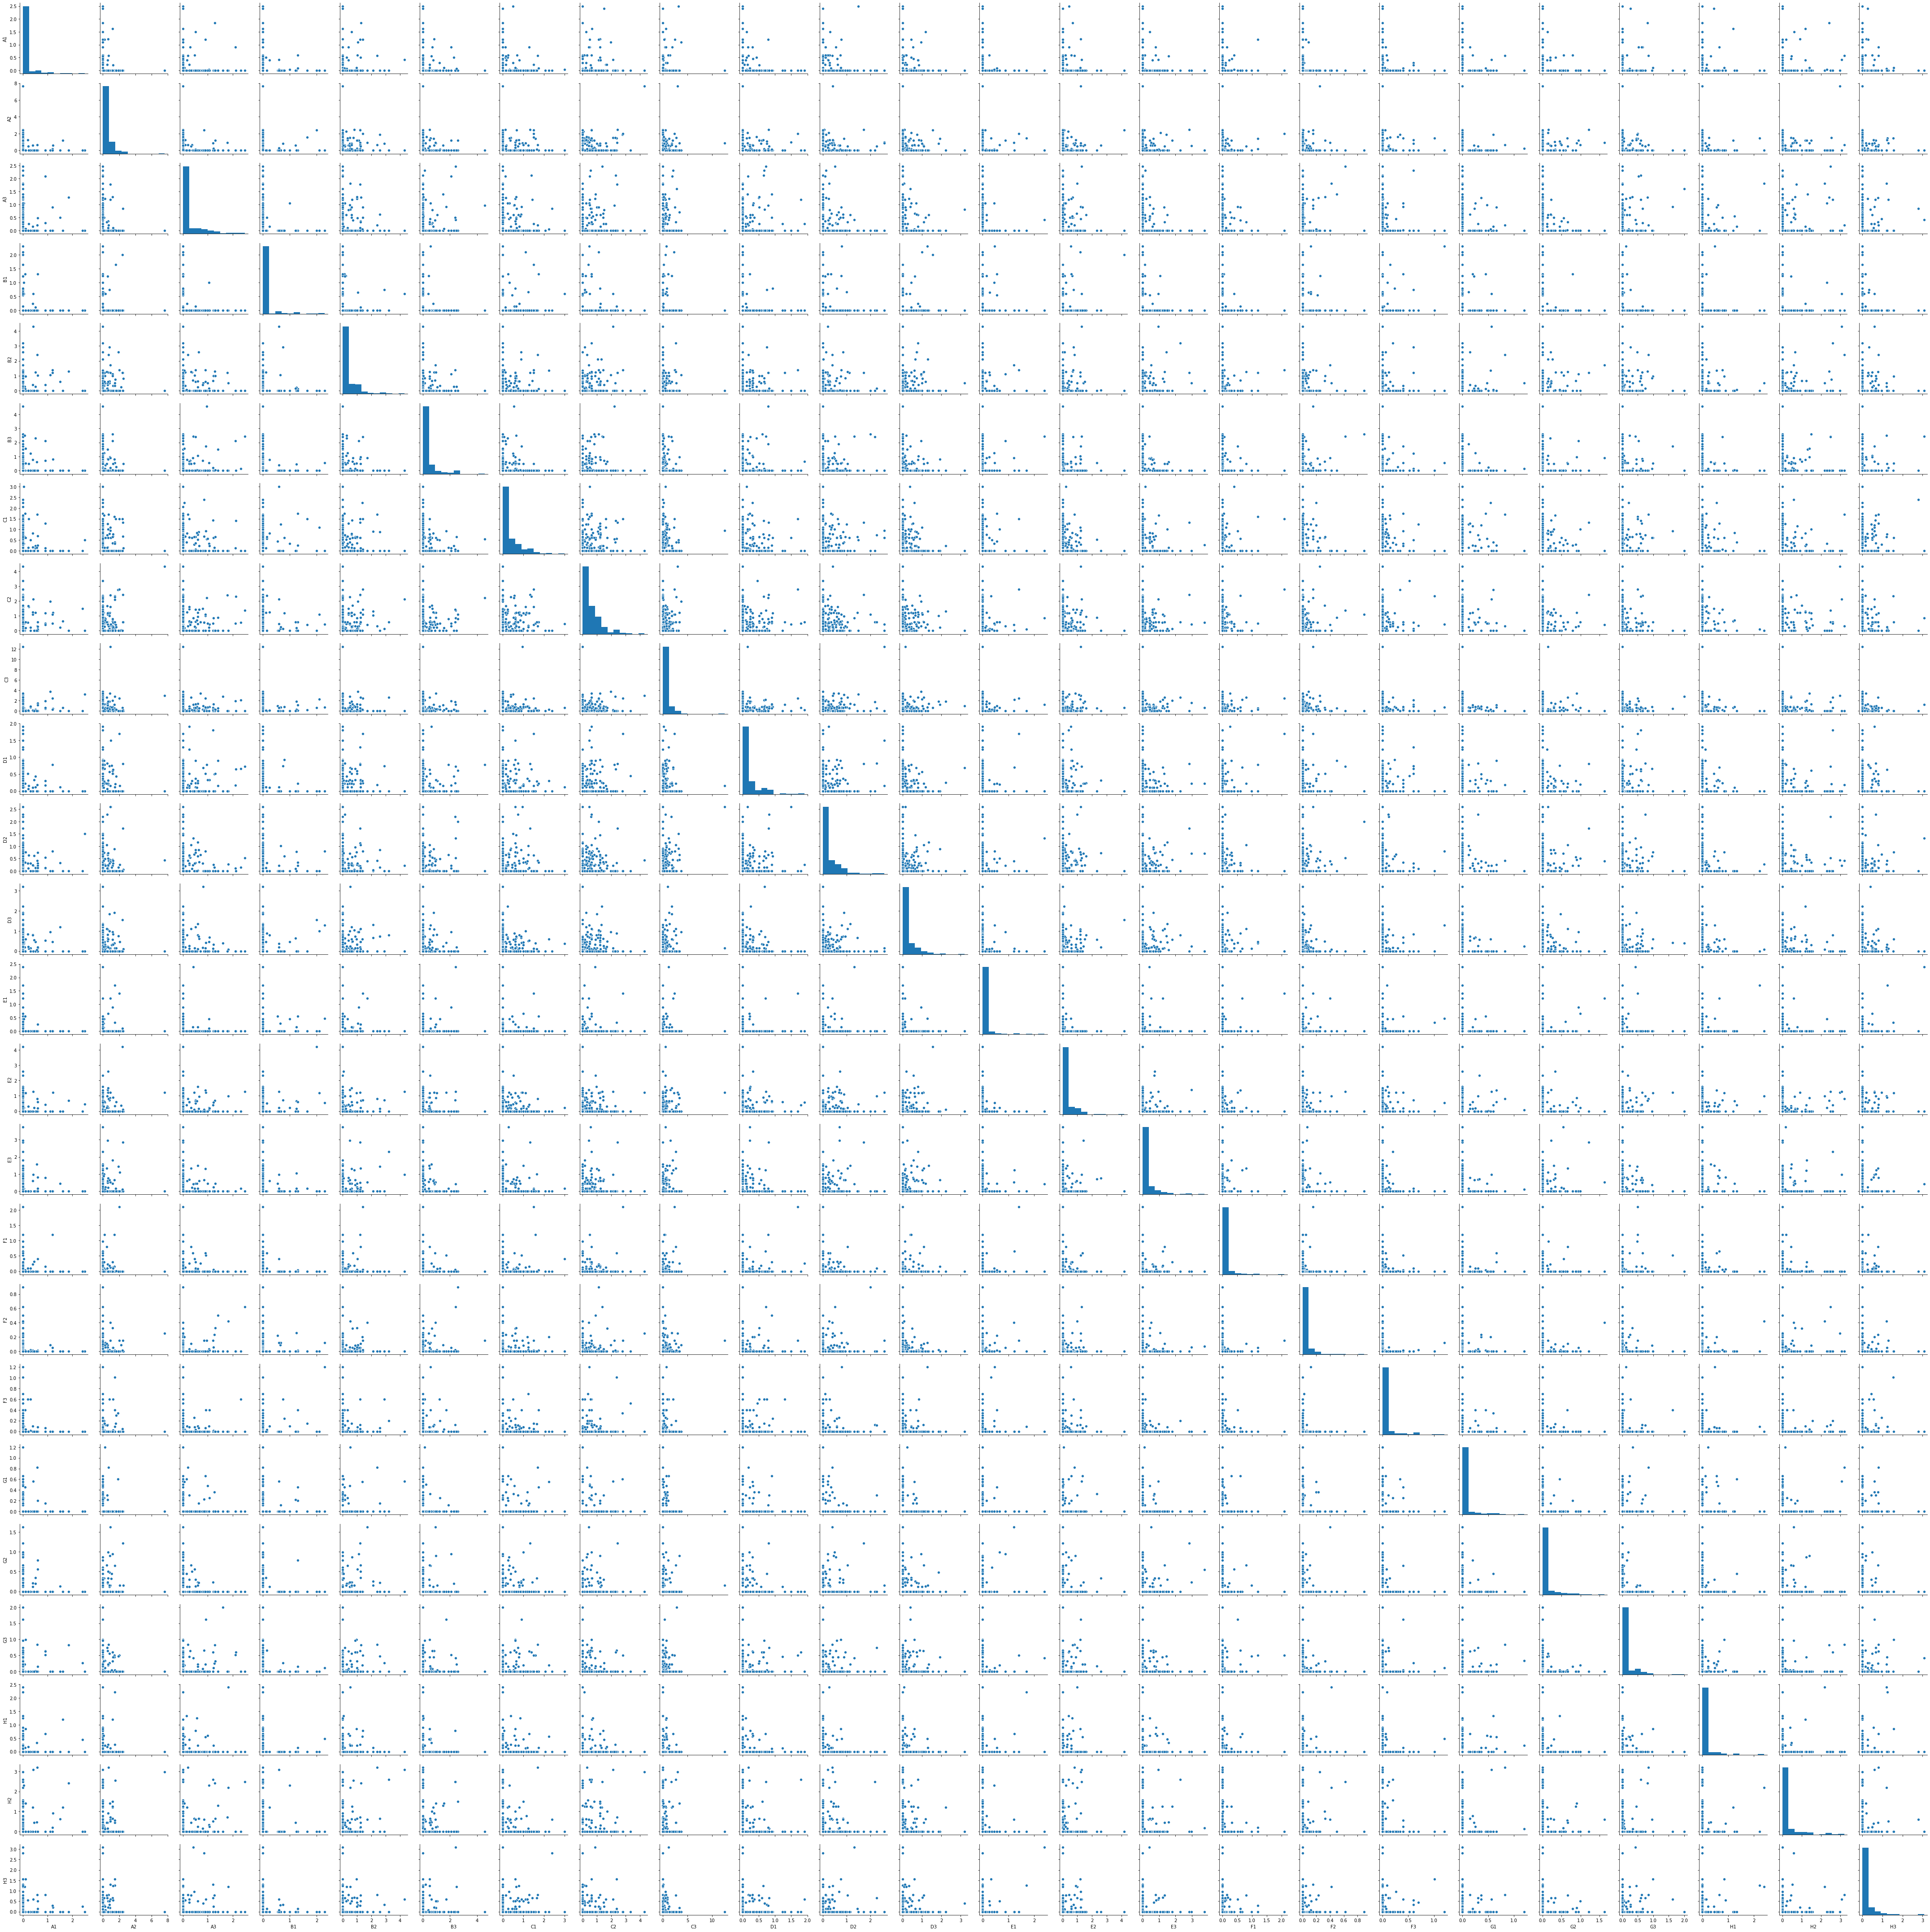

In [79]:

# sns.pairplot(X)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=25)

In [31]:

# Initialize a list to store the beta values for each linear regression model
linear_coef = []
linear_score = []

# Loop over all the predictors
# In each loop "i" holds the name of the predictor 
for i in X_train:
    
    # Set the current predictor as the variable x_train
    x_train = X_train[[i]]

    # Create a linear regression object
    linreg = LinearRegression()

    # Fit the model with training data 
    # Remember to choose only one column at a time i.e. given by x_train (not X_train)
    linreg.fit(x_train,y_train)
    
    # Add the coefficient value of the model to the list
    linear_coef.append(linreg.coef_)
    linear_score.append(linreg.score(X_test[[i]], y_test))
    
linear_coef
linear_score


[-0.01924381774235595,
 -0.020179528653618606,
 0.0735008012722238,
 -0.011347260752541777,
 0.06097782213296732,
 -0.029824070702662023,
 -0.0045260065899124236,
 0.048724560150974816,
 0.011573956508181937,
 -0.008507833856371994,
 -0.038519961352654786,
 0.04592103500618294,
 -0.004198282044052037,
 -0.03625774997227138,
 -0.03631113994437185,
 -0.07222782488786272,
 -0.01987902833302302,
 -0.15596392703361772,
 -0.018000552444917384,
 -0.0052152178556175155,
 -0.07589266835454977,
 -0.030031002271343036,
 0.09138136011016051,
 0.014686613304396912]

In [32]:
# nan_index = []
# # Get index of nan values in all columns
# for column in df.columns:
#     nan_index.add( list(df[column].index[df[column].apply(np.isnan)]))
# nan_index

### Multi-Linear Regression using all variables

In [17]:
r2 = []
for rs in range(1):    
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

    # Perform multi-linear regression with all predictors
    multi_linear = LinearRegression()

    # Fit the multi-linear regression on all features of the entire data
    multi_linear.fit(X_train,y_train)

    # Get the coefficients (plural) of the model
    multi_coef = multi_linear.coef_
    # print(multi_coef)

    r2.append(multi_linear.score(X_test,y_test))
r2

[0.5156554784644096]

#### Printing the individual $\beta$ values

By simple(one variable) linear regression for each variable:
'Value of beta1 = 3.61'
'Value of beta2 = -2.89'
'Value of beta3 = -10.95'
'Value of beta4 = -3.49'
